# Polars Demo

In [1]:
import numpy as np
import polars as pl

num_rows = 5000
rng = np.random.default_rng(seed=7)

buildings_data = {
    "sqft":rng.exponential(scale=1000, size=num_rows),
    "year":rng.integers(low=1995, high=2023, size=num_rows),
    "building_type":rng.choice(["A","B","C"], size=num_rows)
}

In [2]:
buildings = pl.DataFrame(buildings_data)
buildings

sqft,year,building_type
f64,i64,str
707.529256,1996,"""C"""
1025.203348,2020,"""C"""
568.548657,2012,"""A"""
895.109864,2000,"""A"""
206.532754,2011,"""A"""
3383.637351,2018,"""B"""
9.753627,2007,"""A"""
2809.215763,2004,"""B"""
575.332756,2021,"""A"""


In [3]:
buildings.schema

OrderedDict([('sqft', Float64), ('year', Int64), ('building_type', Utf8)])

In [4]:
buildings.head()

sqft,year,building_type
f64,i64,str
707.529256,1996,"""C"""
1025.203348,2020,"""C"""
568.548657,2012,"""A"""
895.109864,2000,"""A"""
206.532754,2011,"""A"""


In [5]:
buildings.describe()

describe,sqft,year,building_type
str,f64,f64,str
"""count""",5000.0,5000.0,"""5000"""
"""null_count""",0.0,0.0,"""0"""
"""mean""",994.094456,2008.5258,null
"""std""",1016.641569,8.062353,null
"""min""",1.133256,1995.0,"""A"""
"""25%""",286.807549,2001.0,null
"""50%""",669.406964,2009.0,null
"""75%""",1343.539279,2015.0,null
"""max""",9307.793917,2022.0,"""C"""


In [6]:
# Contexts
buildings.select("sqft")

sqft
f64
707.529256
1025.203348
568.548657
895.109864
206.532754
3383.637351
9.753627
2809.215763
575.332756


In [7]:
buildings.select(pl.col("sqft")) # more powerful

sqft
f64
707.529256
1025.203348
568.548657
895.109864
206.532754
3383.637351
9.753627
2809.215763
575.332756


In [8]:
buildings.select(pl.col("sqft").sort() / 1000)

sqft
f64
0.001133
0.001152
0.001429
0.001439
0.001505
0.001597
0.001747
0.00195
0.002005


In [9]:
after_2015 = buildings.filter(pl.col("year") > 2015)
after_2015

sqft,year,building_type
f64,i64,str
1025.203348,2020,"""C"""
3383.637351,2018,"""B"""
575.332756,2021,"""A"""
541.135894,2017,"""A"""
735.857274,2021,"""A"""
60.046343,2017,"""C"""
2195.964802,2017,"""C"""
250.345347,2018,"""C"""
3795.412485,2019,"""B"""


In [10]:
after_2015.select(pl.col("year").min())

year
i64
2016


In [11]:
buildings.groupby("building_type").agg(
    [
        pl.mean("sqft").alias("mean_sqft"),
        pl.median("year").alias("median_year"),
        pl.count(),
    ]
)

C:\Users\anura\AppData\Local\Temp\ipykernel_47072\2391365277.py:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  buildings.groupby("building_type").agg(


building_type,mean_sqft,median_year,count
str,f64,f64,u32
"""C""",999.854722,2009.0,1692
"""B""",992.754444,2009.0,1655
"""A""",989.539918,2009.0,1653


## The Lazy API

With the lazy API, you can specify a sequence of operations without immediately running them. Instead, these operations are saved as a computational graph and only run when necessary. This allows Polars to optimize queries before execution, catch schema errors before the data is processed, and perform memory-efficient queries on datasets that don’t fit into memory.

In [12]:
num_rows = 5000
rng = np.random.default_rng(seed=7)

buildings = {
   "sqft": rng.exponential(scale=1000, size=num_rows),
   "price": rng.exponential(scale=100_000, size=num_rows),
   "year": rng.integers(low=1995, high=2023, size=num_rows),
   "building_type": rng.choice(["A", "B", "C"], size=num_rows),
}
buildings_lazy = pl.LazyFrame(buildings)
buildings_lazy

<LazyFrame [4 cols, {"sqft": Float64 … "building_type": Utf8}] at 0x28A021D3B20>

In [13]:
lazy_query = (
   buildings_lazy
   .with_columns(
       (pl.col("price") / pl.col("sqft")).alias("price_per_sqft")
   )
   .filter(pl.col("price_per_sqft") > 100)
   .filter(pl.col("year") < 2010)
)
lazy_query

<LazyFrame [5 cols, {"sqft": Float64 … "price_per_sqft": Float64}] at 0x28A21B59C90>

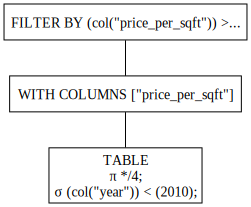

In [14]:
lazy_query.show_graph()

You read query plan graphs from bottom to top in Polars, and each box corresponds to a stage in the query plan. Sigma (σ) and pi (π) are symbols from relational algebra, and they tell you the operation that you’re performing on the data.

In this example, π */4 says that you’re working with all four columns of the DataFrame, and σ(col(“year”)) < 2010 tells you that you’re only processing rows with a year less than 2010. You can interpret the full query plan with these steps:

Use the four columns of buildings_lazy, and filter buildings_lazy to rows where year is less than 2010.
Create the price_per_sqft column.
Filter buildings_lazy to all rows where price_per_sqft is greater than 100.

In [15]:
print(lazy_query.explain())

FILTER [(col("price_per_sqft")) > (100.0)] FROM
 WITH_COLUMNS:
 [[(col("price")) / (col("sqft"))].alias("price_per_sqft")]
  DF ["sqft", "price", "year", "building_type"]; PROJECT */4 COLUMNS; SELECTION: "[(col(\"year\")) < (2010)]"


In [16]:
lazy_query.explain()

'FILTER [(col("price_per_sqft")) > (100.0)] FROM\n WITH_COLUMNS:\n [[(col("price")) / (col("sqft"))].alias("price_per_sqft")]\n  DF ["sqft", "price", "year", "building_type"]; PROJECT */4 COLUMNS; SELECTION: "[(col(\\"year\\")) < (2010)]"'

Run the lazy query

In [17]:
(
    lazy_query
    .collect()
    .select(pl.col(["price_per_sqft", "year"]))
)

price_per_sqft,year
f64,i64
3268.19045,1996
274.339166,2000
296.979717,2004
378.86472,2002
127.302589,1995
218.687856,2003
1428.856343,2001
212.692019,2007
158.084142,1997


In [18]:
(
    lazy_query
    .collect()
    .select(pl.col(["price_per_sqft", "year"]))
    .describe()
)

describe,price_per_sqft,year
str,f64,f64
"""count""",1317.0,1317.0
"""null_count""",0.0,0.0
"""mean""",1400.622815,2002.003037
"""std""",5755.888716,4.324595
"""min""",100.02061,1995.0
"""25%""",166.351274,1998.0
"""50%""",296.71958,2002.0
"""75%""",744.552161,2006.0
"""max""",90314.966163,2009.0


## Scanning Data with Lazy Frames

In [19]:
# downloads.py

import requests
import pathlib

def download_file(file_url: str, local_file_path: pathlib.Path) -> None:
    """Download a file and save it with the specified file name."""
    response = requests.get(file_url)
    if response:
        local_file_path.write_bytes(response.content)
        print(f"File successfully downloaded and stored at: {local_file_path}")
    else:
        raise requests.exceptions.RequestException(
            f"Failed to download the file. Status code: {response.status_code}"
        )

In [20]:
import pathlib

url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
local_file_path = pathlib.Path("electric_cars.csv")

download_file(url, local_file_path)

File successfully downloaded and stored at: electric_cars.csv


In [21]:
lazy_car_data = pl.scan_csv(local_file_path)

In [22]:
lazy_car_data.schema

OrderedDict([('VIN (1-10)', Utf8),
             ('County', Utf8),
             ('City', Utf8),
             ('State', Utf8),
             ('Postal Code', Int64),
             ('Model Year', Int64),
             ('Make', Utf8),
             ('Model', Utf8),
             ('Electric Vehicle Type', Utf8),
             ('Clean Alternative Fuel Vehicle (CAFV) Eligibility', Utf8),
             ('Electric Range', Int64),
             ('Base MSRP', Int64),
             ('Legislative District', Int64),
             ('DOL Vehicle ID', Int64),
             ('Vehicle Location', Utf8),
             ('Electric Utility', Utf8),
             ('2020 Census Tract', Int64)])

In [23]:
lazy_car_query = (
    lazy_car_data
    .filter((pl.col("Model Year") >= 2018))
    .filter(
        pl.col("Electric Vehicle Type") == "Battery Electric Vehicle (BEV)"
    )
    .groupby(["State", "Make"])
    .agg(
        pl.mean("Electric Range").alias("Average Electric Range"),
        pl.min("Model Year").alias("Oldest Model Year"),
        pl.count().alias("Number of Cars"),
    )
    .filter(pl.col("Average Electric Range") > 0)
    .filter(pl.col("Number of Cars") > 5)
    .sort(pl.col("Number of Cars"), descending=True)
)

C:\Users\anura\AppData\Local\Temp\ipykernel_47072\318446304.py:7: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(["State", "Make"])


In [24]:
lazy_car_query.collect()

State,Make,Average Electric Range,Oldest Model Year,Number of Cars
str,str,f64,i64,u32
"""WA""","""TESLA""",73.887368,2018,66340
"""WA""","""NISSAN""",82.384678,2018,6096
"""WA""","""CHEVROLET""",103.472937,2018,6060
"""WA""","""FORD""",0.146663,2018,4091
"""WA""","""KIA""",53.037093,2018,3963
"""WA""","""VOLKSWAGEN""",17.925736,2018,3905
"""WA""","""HYUNDAI""",19.420546,2018,3115
"""WA""","""AUDI""",78.361895,2019,1879
"""WA""","""BMW""",15.488038,2018,1672
